# Markowitz portfolio optimization


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 200)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from library.dataset import load_train_test_dataset
from library.correlations import get_correlation_matrices, N_REMAINING_COMPONENTS


observations_train, observations_test = load_train_test_dataset()
correlations_train, correlations_test = get_correlation_matrices(observations_train, True, N_REMAINING_COMPONENTS, N_REMAINING_COMPONENTS), get_correlation_matrices(observations_test, True, N_REMAINING_COMPONENTS, N_REMAINING_COMPONENTS)

Original number of tickers: 246
Drop tickers: ['IRAO']
Start date = 2013-12-16
Filtered number of tickers: 30
Stocks: ['AFLT', 'ALRS', 'GCHE', 'HYDR', 'LKOH', 'LSRG', 'MGNT', 'MOEX', 'MRKC', 'MRKP', 'MSNG', 'MSRS', 'MTLR', 'MTLRP', 'MTSS', 'NVTK', 'PHOR', 'PIKK', 'POLY', 'RTKM', 'RTKMP', 'SBER', 'SBERP', 'TATN', 'TATNP', 'TGKA', 'TRMK', 'TRNFP', 'UTAR', 'VTBR']
DataFrame size after merge: 2255
DataFrame size after removing some years: 1753

2015 year: 246 observations
2016 year: 252 observations
2017 year: 252 observations
2018 year: 246 observations
2019 year: 252 observations
2020 year: 250 observations
2021 year: 255 observations

Train size: 1227. Test size: 526. Test ratio: 0.3000570450656018
Train: 1101. Test: 472. Test ratio: 0.3000635727908455


In [4]:
from pathlib import Path


Path('cache/markowitz_mu/').mkdir(exist_ok=True)
Path('cache/markowitz_q/').mkdir(exist_ok=True)

In [5]:
from library.markowitz import get_markowitz_w, MarkowitzMethod
from library.backtest import Strategy, compare_strategies, PortfolioTrainTestStats


def get_strategy(name, corr_name, method, parameters, Sigmas_train, Sigmas_test) -> Strategy:
    return Strategy(
        name=f'{name} ({corr_name})',
        get_train_w=lambda: get_markowitz_w(observations_train, method=method, parameters=parameters, Sigmas=Sigmas_train),
        get_test_w=lambda: get_markowitz_w(observations_test, method=method, parameters=parameters, Sigmas=Sigmas_test)
    )


def try_method(method: MarkowitzMethod, parameters: list[dict], names: list[str], cache_folder: str, **kwargs) -> list[PortfolioTrainTestStats]:
    strategies = []

    for Sigmas_train, Sigmas_test, corr_name in zip(
        [correlations_train.Sigmas, correlations_train.Sigmas_denoised, correlations_train.Sigmas_detoned, correlations_train.Sigmas_detoned_denoised],
        [correlations_test.Sigmas, correlations_test.Sigmas_denoised, correlations_test.Sigmas_detoned, correlations_test.Sigmas_detoned_denoised],
        ['Sigma', 'Sigma_denoised', 'Sigma_detoned', 'Sigma_denoised_detoned']
    ):
        for params, name in zip(parameters, names):
            strategies.append(
                get_strategy(name, corr_name, method, params, Sigmas_train, Sigmas_test)
            )

    return compare_strategies(strategies, observations_train, observations_test, cache_folder=cache_folder, **kwargs)

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

Markowitz with mu=0% (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             10.88% ± 10.85%  12.86% ± 11.71%  19.47% ± 14.76%  21.06% ± 18.24%
sharpe ratio              1.002622         1.098274         1.319133         1.154165
difference         -1.98% ± 10.71%    0.00% ± 0.00%  -1.59% ± 16.59%    0.00% ± 0.00%
information ratio        -0.184906              NaN        -0.095869              NaN

Markowitz with mu=15% (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             11.87% ± 10.97%  12.86% ± 11.71%  19.41% ± 14.38%  21.06% ± 18.24%
sharpe ratio              1.082392         1.098274         1.350059         1.154165
difference         -0.98% ± 10.76%    0.00% ± 0.00%  -1.65% ± 16.62%    0.00% ± 0.00%
information ratio        -0.091528              NaN        -0.099205              NaN

Markowitz with mu=0% (Sigma_denoised)
                  portfolio_train   basel

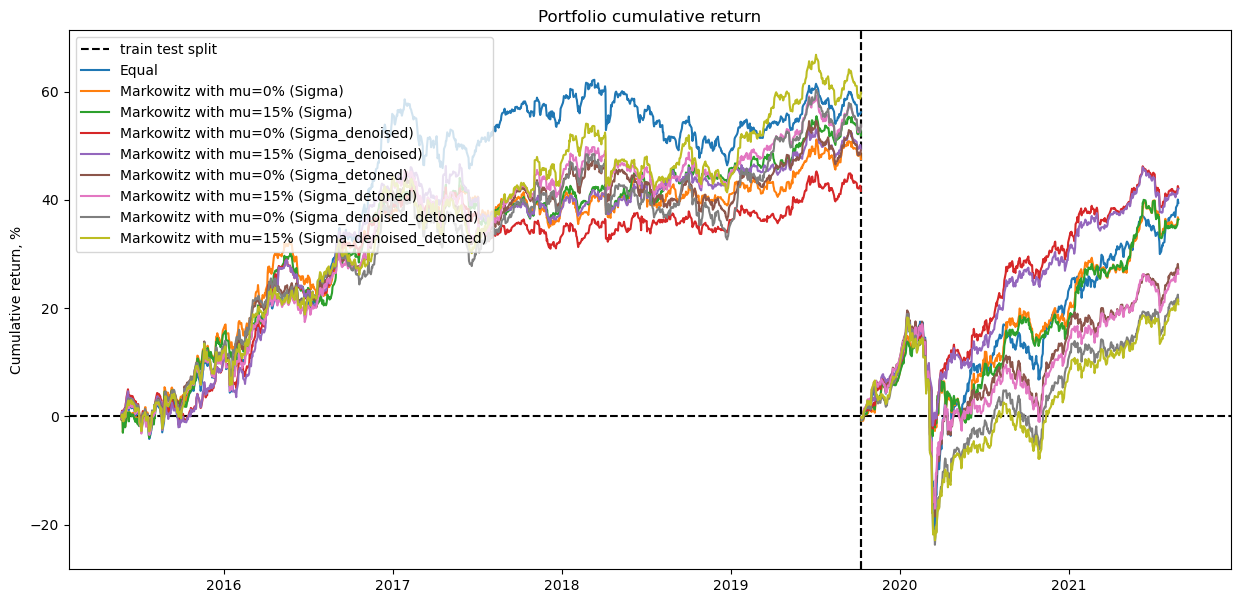

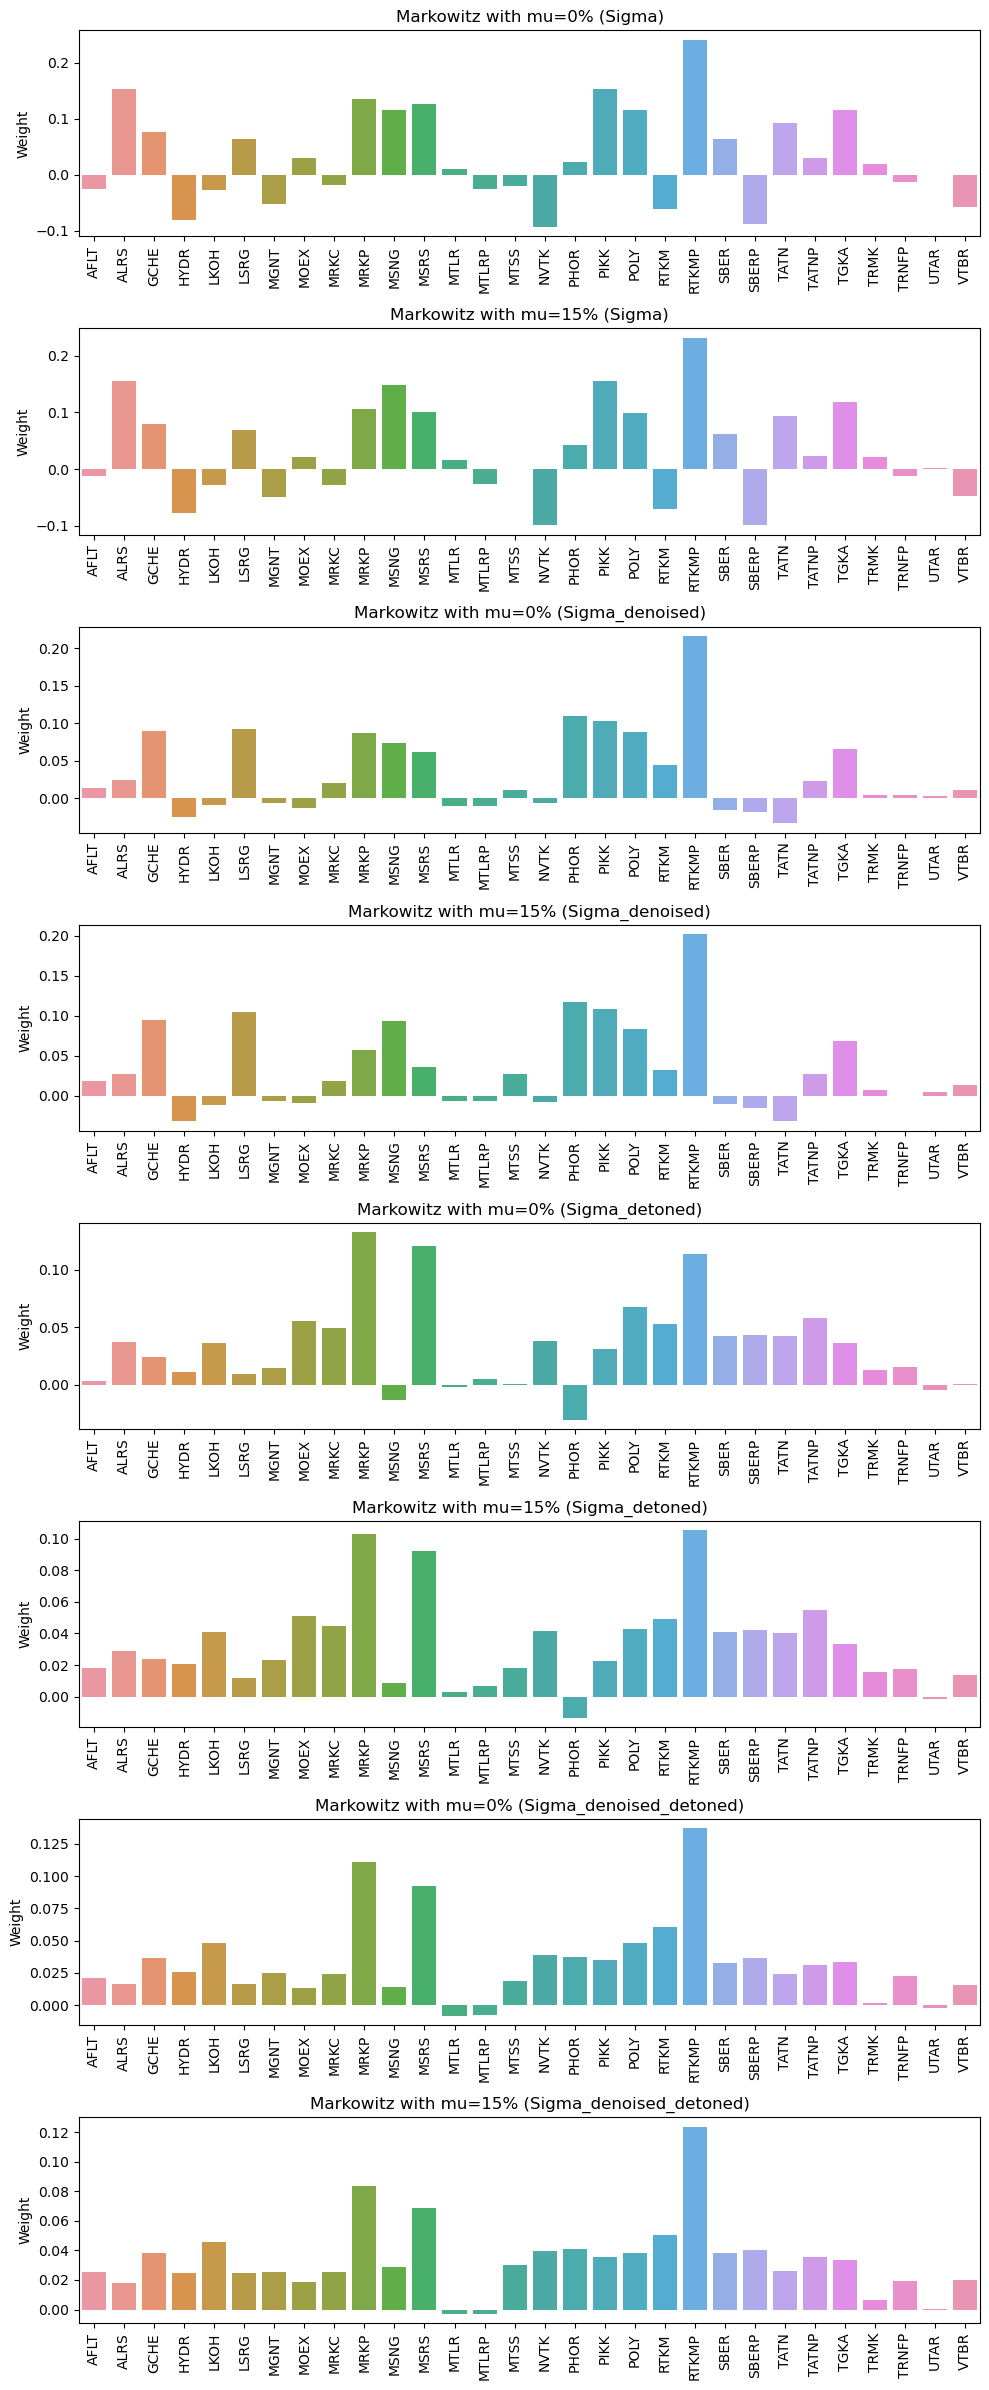

In [6]:
params = [0, 15]
parameters = [{'mu_year_pct': mu_year_pct} for mu_year_pct in params]
names = [f'Markowitz with mu={mu_year_pct}%' for mu_year_pct in params]
min_variance_given_mu_stats = try_method(MarkowitzMethod.MinVarianceGivenMu, parameters, names, 'cache/markowitz_mu/')

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

d:\Learning\3_course\Course work\neurotrader\research\library\backtest.py:84: RuntimeWarning: invalid value encountered in double_scalars
  return mean, std, mean / std
d:\Learning\3_course\Course work\neurotrader\research\library\backtest.py:84: RuntimeWarning: invalid value encountered in double_scalars
  return mean, std, mean / std


  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

d:\Learning\3_course\Course work\neurotrader\research\library\backtest.py:84: RuntimeWarning: invalid value encountered in double_scalars
  return mean, std, mean / std
d:\Learning\3_course\Course work\neurotrader\research\library\backtest.py:84: RuntimeWarning: invalid value encountered in double_scalars
  return mean, std, mean / std


  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

  0%|          | 0/1101 [00:00<?, ?it/s]

  0%|          | 0/472 [00:00<?, ?it/s]

Markowitz with q=0.0 (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             12.93% ± 11.69%  12.86% ± 11.71%  18.68% ± 16.37%  21.06% ± 18.24%
sharpe ratio              1.105884         1.098274         1.141756         1.154165
difference           0.07% ± 0.48%    0.00% ± 0.00%   -2.37% ± 5.22%    0.00% ± 0.00%
information ratio         0.144917              NaN        -0.454659              NaN

Markowitz with q=0.2 (Sigma)
                   portfolio_train   baseline_train   portfolio_test    baseline_test
return             30.55% ± 24.28%  12.86% ± 11.71%  26.68% ± 21.07%  21.06% ± 18.24%
sharpe ratio              1.258275         1.098274         1.266531         1.154165
difference         17.69% ± 20.63%    0.00% ± 0.00%   5.63% ± 15.29%    0.00% ± 0.00%
information ratio         0.857707              NaN         0.368079              NaN

Markowitz with q=0.4 (Sigma)
                   portfolio_train   baseline_train

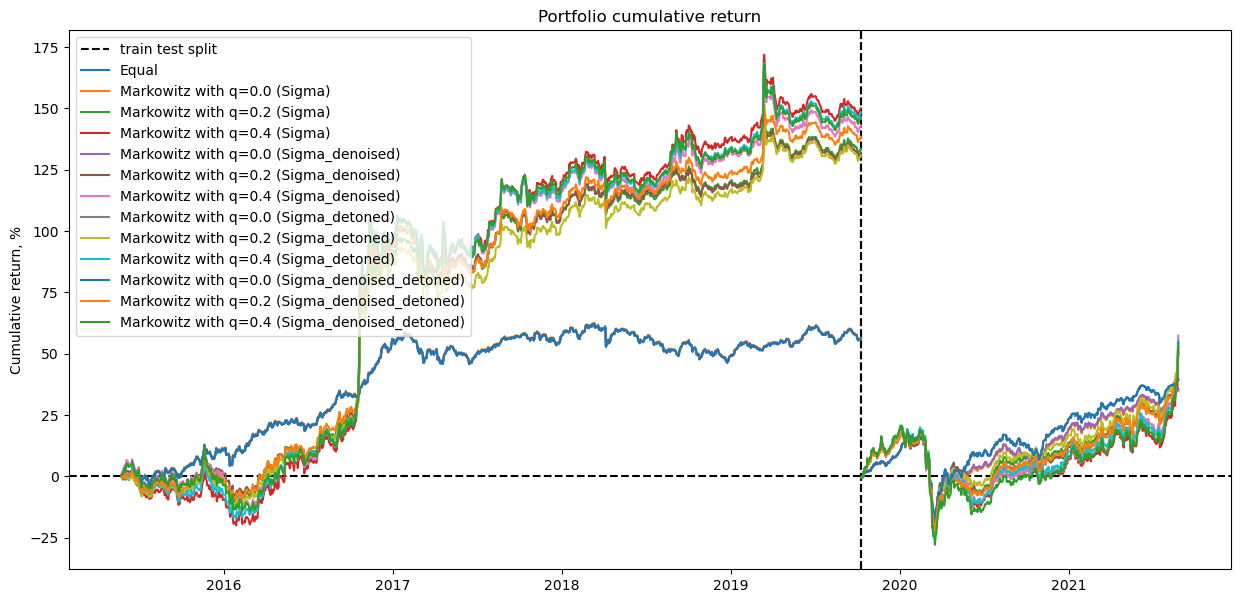

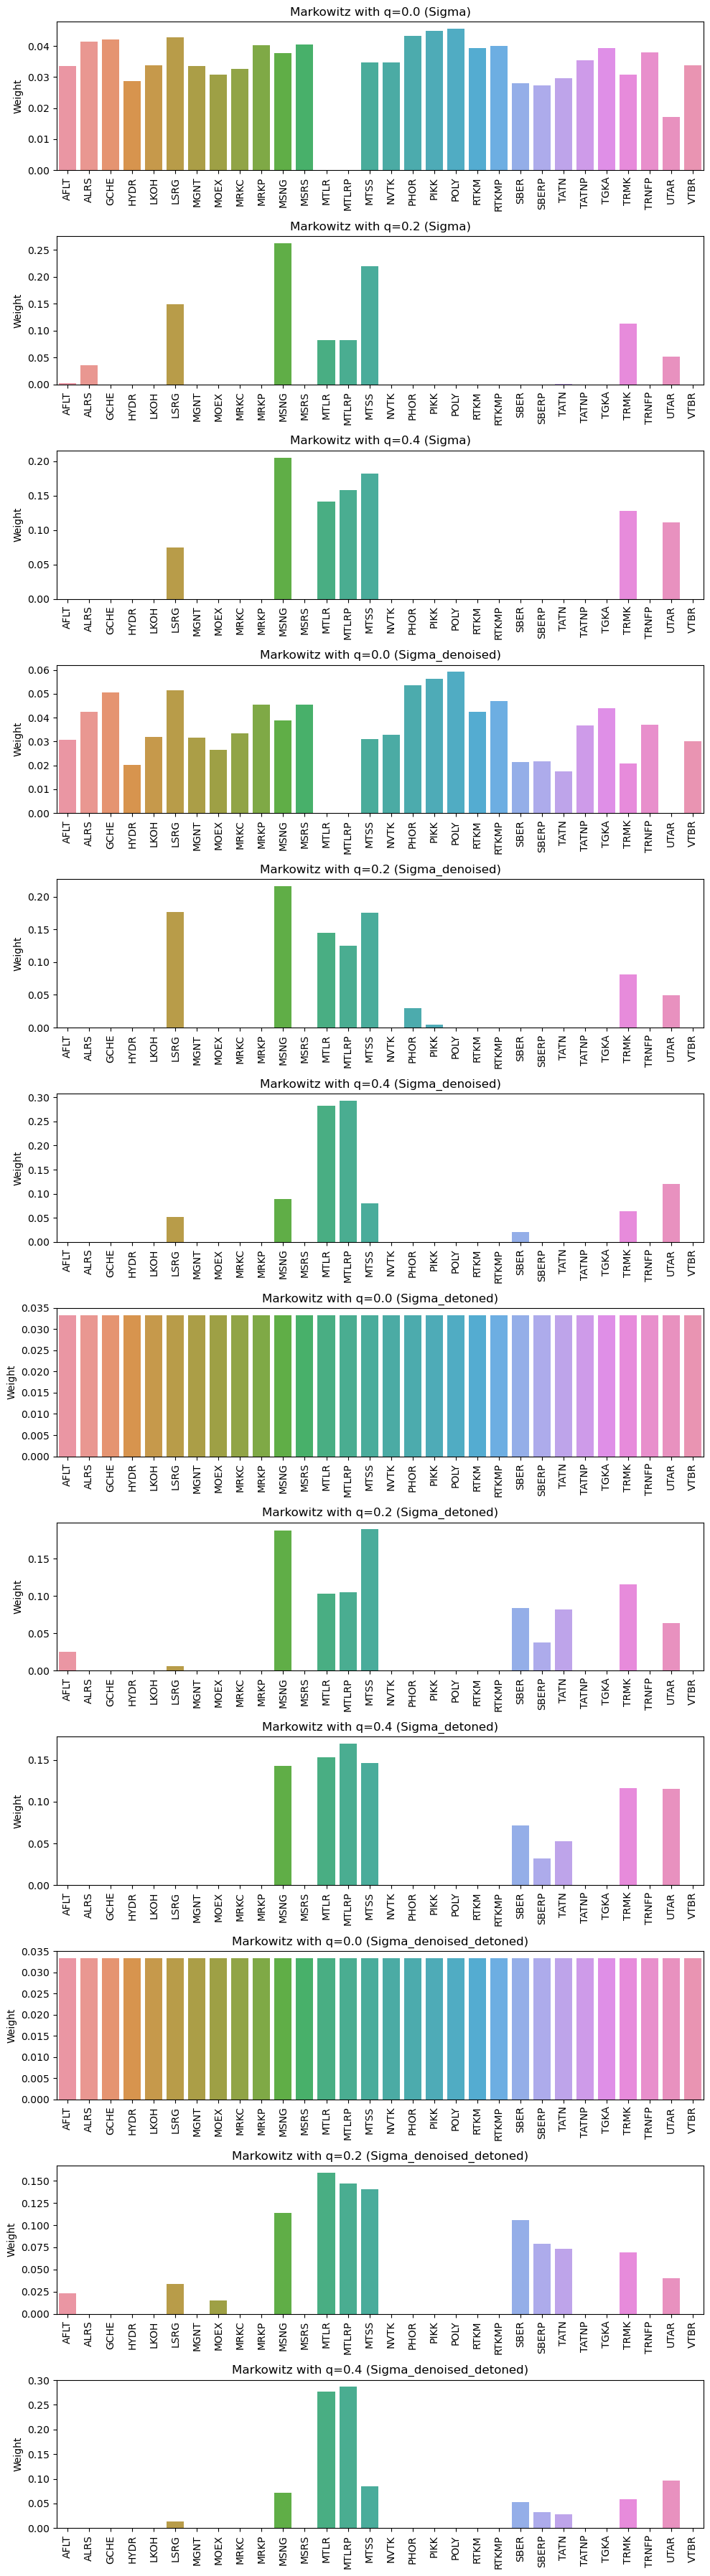

In [7]:
params = [0.0, 0.2, 0.4]
parameters = [{'q': q} for q in params]
names = [f'Markowitz with q={q}' for q in params]
min_variance_max_return_given_q_stats = try_method(MarkowitzMethod.MinVarianceMaxReturnGivenQ, parameters, names, 'cache/markowitz_q/')